In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
import seaborn as sn

In [2]:
train=pd.read_csv('E:\\DataScience\\Inceptez\\MAchinelearning\\Loan_Predict\\train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('E:\\DataScience\\Inceptez\\MAchinelearning\\Loan_Predict\\test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
train[train.Gender.isna()]

Loan_ID Gender Married Dependents     Education Self_Employed  \
23   LP001050    NaN     Yes          2  Not Graduate            No   
126  LP001448    NaN     Yes         3+      Graduate            No   
171  LP001585    NaN     Yes         3+      Graduate            No   
188  LP001644    NaN     Yes          0      Graduate           Yes   
314  LP002024    NaN     Yes          0      Graduate            No   
334  LP002103    NaN     Yes          1      Graduate           Yes   
460  LP002478    NaN     Yes          0      Graduate           Yes   
467  LP002501    NaN     Yes          0      Graduate            No   
477  LP002530    NaN     Yes          2      Graduate            No   
507  LP002625    NaN      No          0      Graduate            No   
576  LP002872    NaN     Yes          0      Graduate            No   
588  LP002925    NaN      No          0      Graduate            No   
592  LP002933    NaN      No         3+      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
23              3365             1917.0       112.0             360.0   
126            23803                0.0       370.0             360.0   
171            51763                0.0       700.0             300.0   
188              674             5296.0       168.0             360.0   
314             2473             1843.0       159.0             360.0   
334             9833             1833.0       182.0             180.0   
460             2083             4083.0       160.0             360.0   
467            16692                0.0       110.0             360.0   
477             2873             1872.0       132.0             360.0   
507             3583                0.0        96.0             360.0   
576             3087             2210.0       136.0             360.0   
588             4750                0.0        94.0             360.0   
592             9357                0.0       292.0             360.0   

     Credit_History Property_Area Loan_Status  
23              0.0         Rural           N  
126             1.0         Rural           Y  
171             1.0         Urban           Y  
188             1.0         Rural           Y  
314             1.0         Rural           N  
334             1.0         Urban           Y  
460             NaN     Semiurban           Y  
467             1.0     Semiurban           Y  
477             0.0     Semiurban           N  
507             1.0         Urban           N  
576             0.0     Semiurban           N  
588             1.0     Semiurban           Y  
592             1.0     Semiurban           Y

In [5]:
train['Gender']=train.groupby(['Education','Property_Area'])['Gender'].transform(lambda x:x.fillna(x.mode()[0]))

In [6]:
train.iloc[104]

Loan_ID              LP001357
Gender                   Male
Married                   NaN
Dependents                NaN
Education            Graduate
Self_Employed              No
ApplicantIncome          3816
CoapplicantIncome         754
LoanAmount                160
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: 104, dtype: object

In [7]:
train[train.Married.isna()]

Loan_ID  Gender Married Dependents Education Self_Employed  \
104  LP001357    Male     NaN        NaN  Graduate            No   
228  LP001760    Male     NaN        NaN  Graduate            No   
435  LP002393  Female     NaN        NaN  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
104             3816              754.0       160.0             360.0   
228             4758                0.0       158.0             480.0   
435            10047                0.0         NaN             240.0   

     Credit_History Property_Area Loan_Status  
104             1.0         Urban           Y  
228             1.0     Semiurban           Y  
435             1.0     Semiurban           Y

In [8]:
condition=(train['ApplicantIncome']>0)&(train['CoapplicantIncome'] >0 ) 

In [9]:
condition2=(train['Married'].isnull())

In [10]:
criteria = condition & condition2

In [11]:
train.loc[criteria,'Married']='Yes'

In [12]:
train['Married'].fillna('No',inplace=True)

In [13]:
train[train.Dependents.isna()]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
102  LP001350    Male     Yes        NaN      Graduate            No   
104  LP001357    Male     Yes        NaN      Graduate            No   
120  LP001426    Male     Yes        NaN      Graduate            No   
226  LP001754    Male     Yes        NaN  Not Graduate           Yes   
228  LP001760    Male      No        NaN      Graduate            No   
293  LP001945  Female      No        NaN      Graduate            No   
301  LP001972    Male     Yes        NaN  Not Graduate            No   
332  LP002100    Male      No        NaN      Graduate            No   
335  LP002106    Male     Yes        NaN      Graduate           Yes   
346  LP002130    Male     Yes        NaN  Not Graduate            No   
355  LP002144  Female      No        NaN      Graduate            No   
435  LP002393  Female      No        NaN      Graduate            No   
517  LP002682    Male     Yes        NaN  Not Graduate            No   
571  LP002847    Male     Yes        NaN      Graduate            No   
597  LP002943    Male      No        NaN      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
102            13650                0.0         NaN             360.0   
104             3816              754.0       160.0             360.0   
120             5667             2667.0       180.0             360.0   
226             4735                0.0       138.0             360.0   
228             4758                0.0       158.0             480.0   
293             5417                0.0       143.0             480.0   
301             2875             1750.0       105.0             360.0   
332             2833                0.0        71.0             360.0   
335             5503             4490.0        70.0               NaN   
346             3523             3230.0       152.0             360.0   
355             3813                0.0       116.0             180.0   
435            10047                0.0         NaN             240.0   
517             3074             1800.0       123.0             360.0   
571             5116             1451.0       165.0             360.0   
597             2987                0.0        88.0             360.0   

     Credit_History Property_Area Loan_Status  
102             1.0         Urban           Y  
104             1.0         Urban           Y  
120             1.0         Rural           Y  
226             1.0         Urban           N  
228             1.0     Semiurban           Y  
293             0.0         Urban           N  
301             1.0     Semiurban           Y  
332             1.0         Urban           Y  
335             1.0     Semiurban           Y  
346             0.0         Rural           N  
355             1.0         Urban           Y  
435             1.0     Semiurban           Y  
517             0.0     Semiurban           N  
571             0.0         Urban           N  
597             0.0     Semiurban           N

In [14]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
train['Dependents']=train.groupby(['Gender','Married','Education','Property_Area'])['Dependents'].transform(lambda x:x.fillna(x.mode()[0]))

In [16]:
train['Self_Employed']=train.groupby(['Gender','Married','Education','Property_Area' ])['Self_Employed'].transform(lambda x:x.fillna(x.mode()[0]))

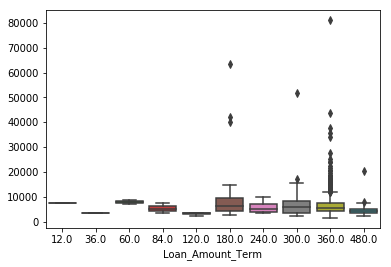

In [17]:
sn.boxplot(train['Loan_Amount_Term'],(train['ApplicantIncome']+train['CoapplicantIncome']))

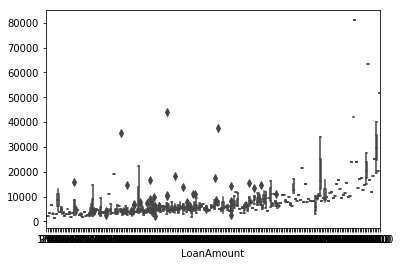

In [18]:
sn.boxplot(train['LoanAmount'],(train['ApplicantIncome']+train['CoapplicantIncome']))

In [19]:
train.describe(include="all")

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    614     614        614       614           614   
unique       614      2       2          4         2             2   
top     LP001647   Male     Yes          0  Graduate            No   
freq           1    502     399        360       480           532   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique              NaN                NaN         NaN               NaN   
top                 NaN                NaN         NaN               NaN   
freq                NaN                NaN         NaN               NaN   
mean        5403.459283        1621.245798  146.412162         342.00000   
std         6109.041673        2926.248369   85.587325          65.12041   
min          150.000000           0.000000    9.000000          12.00000   
25%         2877.500000           0.000000  100.000000         360.00000   
50%         3812.500000        1188.500000  128.000000         360.00000   
75%         5795.000000        2297.250000  168.000000         360.00000   
max        81000.000000       41667.000000  700.000000         480.00000   

        Credit_History Property_Area Loan_Status  
count       564.000000           614         614  
unique             NaN             3           2  
top                NaN     Semiurban           Y  
freq               NaN           233         422  
mean          0.842199           NaN         NaN  
std           0.364878           NaN         NaN  
min           0.000000           NaN         NaN  
25%           1.000000           NaN         NaN  
50%           1.000000           NaN         NaN  
75%           1.000000           NaN         NaN  
max           1.000000           NaN         NaN

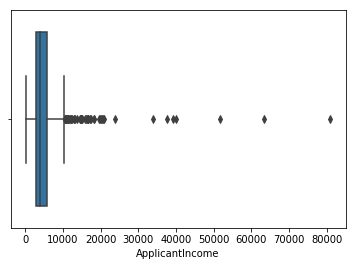

In [20]:
sn.boxplot(train['ApplicantIncome'])

In [21]:
train.query('CoapplicantIncome<=0')

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
4    LP001008    Male      No          0      Graduate            No   
15   LP001032    Male      No          0      Graduate            No   
16   LP001034    Male      No          1  Not Graduate            No   
17   LP001036  Female      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
20   LP001043    Male     Yes          0  Not Graduate            No   
25   LP001066    Male     Yes          0      Graduate           Yes   
28   LP001086    Male      No          0  Not Graduate            No   
31   LP001095    Male      No          0      Graduate            No   
32   LP001097    Male      No          1      Graduate           Yes   
40   LP001119    Male      No          0      Graduate            No   
42   LP001123    Male     Yes          0      Graduate            No   
44   LP001136    Male     Yes          0  Not Graduate           Yes   
45   LP001137  Female      No          0      Graduate            No   
46   LP001138    Male     Yes          1      Graduate            No   
47   LP001144    Male     Yes          0      Graduate            No   
51   LP001157  Female      No          0      Graduate            No   
52   LP001164  Female      No          0      Graduate            No   
53   LP001179    Male     Yes          2      Graduate            No   
54   LP001186  Female     Yes          1      Graduate           Yes   
61   LP001206    Male     Yes         3+      Graduate            No   
63   LP001213    Male     Yes          1      Graduate            No   
64   LP001222  Female      No          0      Graduate            No   
67   LP001233    Male     Yes          1      Graduate            No   
68   LP001238    Male     Yes         3+  Not Graduate           Yes   
69   LP001241  Female      No          0      Graduate            No   
72   LP001248    Male      No          0      Graduate            No   
73   LP001250    Male     Yes         3+  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
548  LP002776  Female      No          0      Graduate            No   
550  LP002778    Male     Yes          2      Graduate           Yes   
557  LP002795    Male     Yes         3+      Graduate           Yes   
561  LP002813  Female     Yes          1      Graduate           Yes   
563  LP002821    Male      No          0  Not Graduate           Yes   
564  LP002832    Male     Yes          2      Graduate            No   
565  LP002833    Male     Yes          0  Not Graduate            No   
566  LP002836    Male      No          0      Graduate            No   
568  LP002840  Female      No          0      Graduate            No   
572  LP002855    Male     Yes          2      Graduate            No   
574  LP002863    Male     Yes         3+      Graduate            No   
580  LP002892    Male     Yes          2      Graduate            No   
582  LP002894  Female     Yes          0      Graduate            No   
583  LP002898    Male     Yes          1      Graduate            No   
587  LP002917  Female      No          0  Not Graduate            No   
588  LP002925    Male      No          0      Graduate            No   
589  LP002926    Male     Yes          2      Graduate           Yes   
591  LP002931    Male     Yes          2      Graduate           Yes   
592  LP002933    Male      No         3+      Graduate           Yes   
594  LP002938    Male     Yes          0      Graduate           Yes   
595  LP002940    Male      No          0  Not Graduate            No   
597  LP002943    Male      No          0      Graduate            No   
598  LP002945    Male     Yes          0      Graduate           Yes   
599  LP002948    Male     Yes          2      

In [22]:
train['ApplicantIncome'].mean()

5403.459283387622

In [23]:
train['LoanAmount']= train.groupby(['Gender', 'Education', 'Self_Employed','Property_Area'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))

In [24]:
train['Loan_Amount_Term']= train.groupby(['Gender', 'Education', 'Self_Employed','Property_Area'])['Loan_Amount_Term'].apply(lambda x: x.fillna(x.median()))

In [49]:
#train['LoanAmount']=   train.groupby(['Gender', 'Education', 'Self_Employed','ApplicantIncome','Property_Area'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))
train['Credit_History']= train.groupby(['Gender', 'Education', 'Self_Employed','Property_Area'])['Credit_History'].apply(lambda x: x.fillna(x.median()))

In [63]:
categorialcolumn=[i  for i in train.columns if train[i].dtype=="object" and i not in ('Loan_ID','Loan_Status')]
categorialcolumn

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [66]:
df_cat=pd.get_dummies(train[categorialcolumn])

In [68]:
numericalcolumn=[i  for i in train.columns if train[i].dtype!="object" and i not in ('Loan_ID','Loan_Status')]
numericalcolumn

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [90]:

scaler =RobustScaler().fit(train[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']])


In [91]:
df_num=scaler.transform(train[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']])

In [92]:
=pd.DataFrame({'ApplicantIncome' :df_num[:,0],
 'CoapplicantIncome':df_num[:,1],
 'LoanAmount':df_num[:,2]})


ApplicantIncome  CoapplicantIncome  LoanAmount
0           0.698029          -0.517358   -0.108108
1           0.264096           0.139079    0.015444
2          -0.278492          -0.517358   -0.942085
3          -0.421422           0.509087   -0.108108
4           0.749786          -0.517358    0.216216
5           0.549957           1.309174    2.162162
6          -0.507112           0.142562   -0.494208
7          -0.266153           0.572641    0.478764
8           0.066324           0.146915    0.633205
9           3.094602           4.257046    3.428571
10         -0.209940          -0.212646   -0.880309
11         -0.449871           0.283600   -0.277992
12         -0.253470           3.011209    1.127413
13         -0.671637           0.718903   -0.200772
14         -0.861525          -0.044619   -1.698842
15          0.389889          -0.517358   -0.030888
16         -0.074207          -0.517358   -0.416988
17         -0.103685          -0.517358   -0.787645
18          0.368295          -0.517358    0.092664
19         -0.415596           1.006203   -0.185328
20          1.318766          -0.517358   -0.355212
21          0.734362           1.931222    2.903475
22         -0.415596           0.314506   -0.169884
23         -0.153385           0.317118   -0.231660
24         -0.032734           0.755904    0.370656
25          1.970009          -0.517358    0.988417
26         -0.347386           0.463380   -0.077220
27          0.141731          -0.064643   -0.262548
28         -0.812511          -0.517358   -1.420849
29         -0.021422           0.389379   -0.108108
..               ...                ...         ...
584        -0.351500           0.317118    0.293436
585         0.161268           0.788552    0.694981
586        -0.519452           0.145174   -0.355212
587        -0.564696          -0.517358   -0.880309
588         0.321337          -0.517358   -0.509653
589        -0.372408          -0.517358   -0.324324
590        -0.278492           0.969638   -1.096525
591         0.749786          -0.517358    1.204633
592         1.900428          -0.517358    2.548263
593         0.015938           0.919142    0.231660
594         4.218509          -0.517358    2.054054
595         0.007027          -0.517358   -0.262548
596         0.881063          -0.082055    0.926641
597        -0.282948          -0.517358   -0.602317
598         2.108141          -0.517358    0.818533
599         0.674379          -0.517358    1.003861
600        -1.164182          17.620416    3.444015
601        -0.314824           0.698008    0.432432
602         0.647986          -0.517358    0.015444
603        -0.046787           1.354881    0.694981
604         2.806341          -0.517358    5.698842
605        -0.484147           1.136794   -0.216216
606        -0.141388           0.570900    0.710425
607         0.059811           0.096855    0.463320
608        -0.198972           0.331483   -0.293436
609        -0.312768          -0.517358   -0.864865
610         0.100600          -0.517358   -1.343629
611         1.459983          -0.412885    1.945946
612         1.292374          -0.517358    0.926641
613         0.264096          -0.517358    0.092664

[614 rows x 3 columns]